In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_regression(n_features=1, bias=100, noise=10, random_state=42)

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100,)

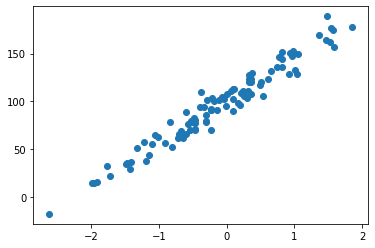

In [5]:
plt.scatter(X, y)

In [6]:
# X = np.random.randn(100, 1)*100 + 100
# noise = np.random.randn(100)*200

# coef = 10
# bias = 30

# y = coef * X + bias + noise

# plt.scatter(X, y)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

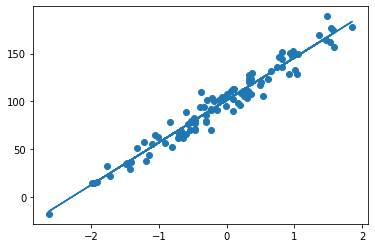

In [10]:
plt.scatter(X, y)
plt.plot(X, model.predict(X))


array([9.03616177])

In [25]:
class LinearRegCustom:
    
    def __init__(self):
        pass
        
    def fit(self, X, y):
        self._X = self.modify_X(X)
        self._y = y.reshape(-1, 1)
        
        self.theta_ = self.get_theta()
        self.intercept = self.theta_.flatten()[0]
        
        self.coef_ = self.theta_.flatten()[1:]
       
    def get_theta(self):
        first = np.dot(self._X.T,self._X)
        sec = np.dot(self._X.T,self._y)
        return np.dot(np.linalg.inv(first),sec)
    
    def modify_X(self,X):
        ones=np.ones([X.shape[0],1])
        return np.hstack([ones ,X])
  
    def hypothesis(self, X):
        X = self.modify_X(X)
        return np.dot(X,self.theta_)
    
    def predict(self, X):
        return self.hypothesis(X).flatten()
    
    def error(self):
        ya = self._y
        yp = self.hypothesis(self._X)
        
        return ((yp-ya)**2).mean()
    
    
        

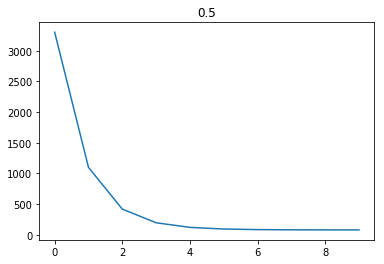

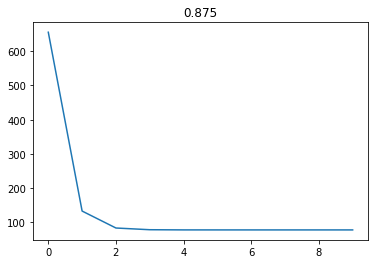

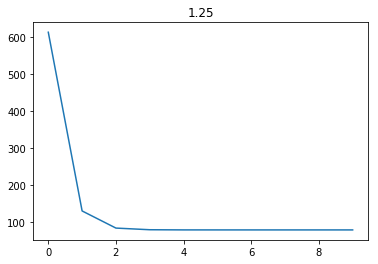

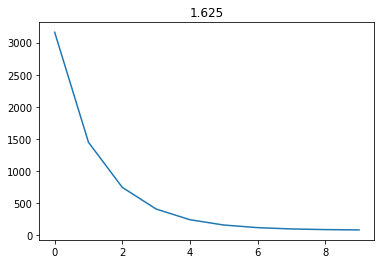

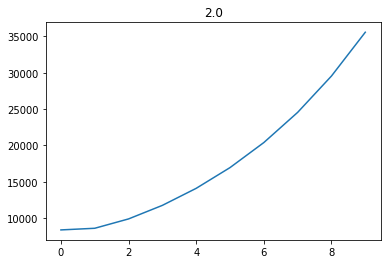

In [101]:
for lr in np.linspace(.5, 2, 5):

    model = LinearRegCustom(lr=lr, max_iter=10)
    errors = model.fit(X, y)
    plt.figure()
    plt.title(str(lr))
    plt.plot(errors)